<a href="https://colab.research.google.com/github/gauravtushar17/Abalone_age_prediction/blob/main/Age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U flask

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

Loading Data


In [3]:
path = "abalone.csv"

In [4]:
dataset = pd.read_csv(path)

In [5]:
dataset.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


Exploring Data



In [6]:
dataset.shape

(4177, 9)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
 dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Visualizing Data

In [9]:
dataset['Sex'] = dataset["Sex"].map({'M':0,'F':1,"I":2})

In [10]:
corr = dataset.corr()
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


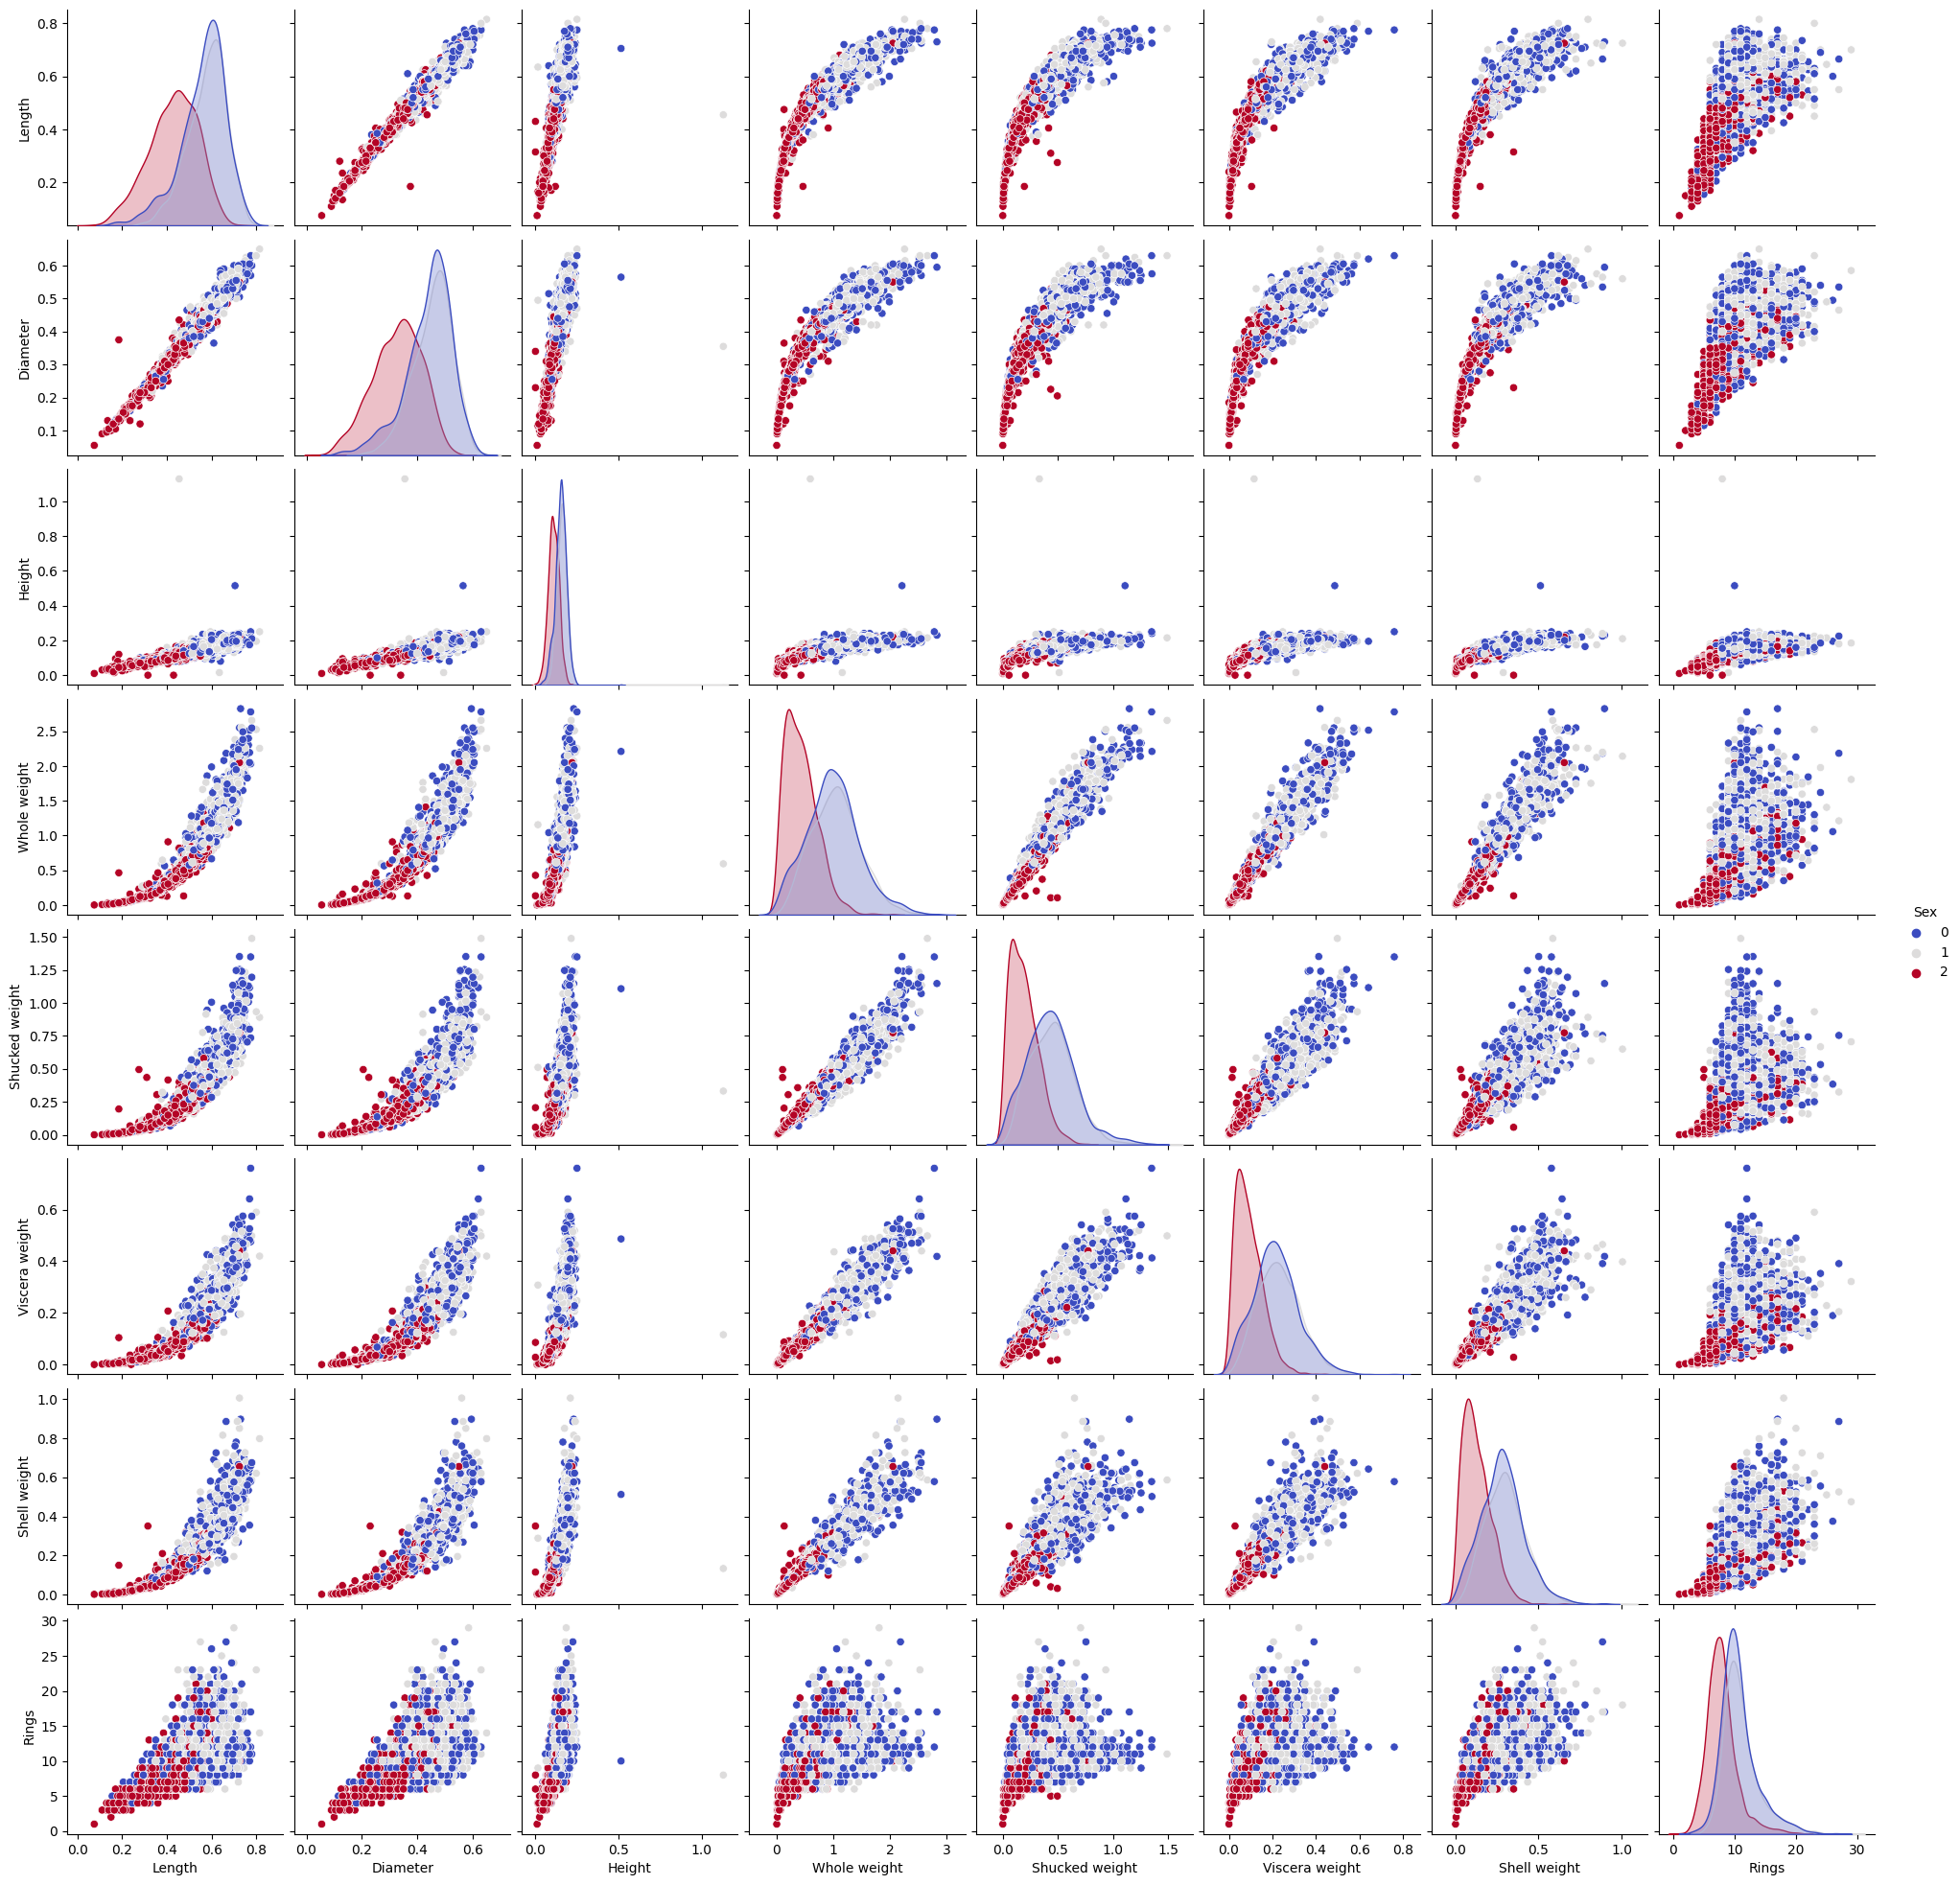

In [12]:

sns.pairplot(dataset,hue = "Sex",palette= "coolwarm")

<Axes: >

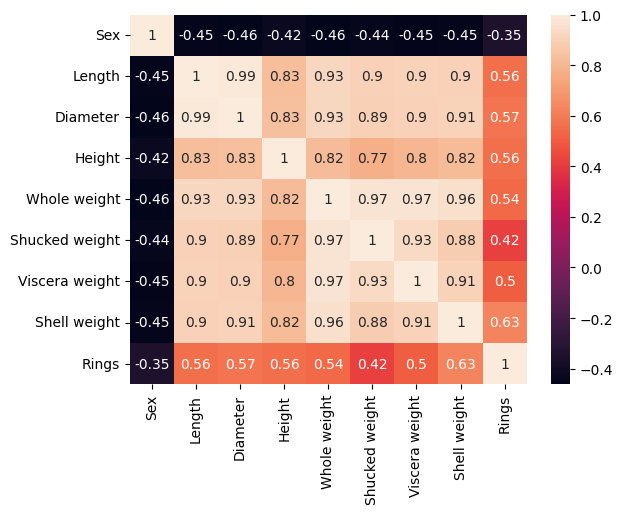

In [13]:
sns.heatmap(corr,annot=True,)

In [14]:

dataset["Sex"].value_counts()

Sex
0    1528
2    1342
1    1307
Name: count, dtype: int64

<Axes: xlabel='Rings', ylabel='Count'>

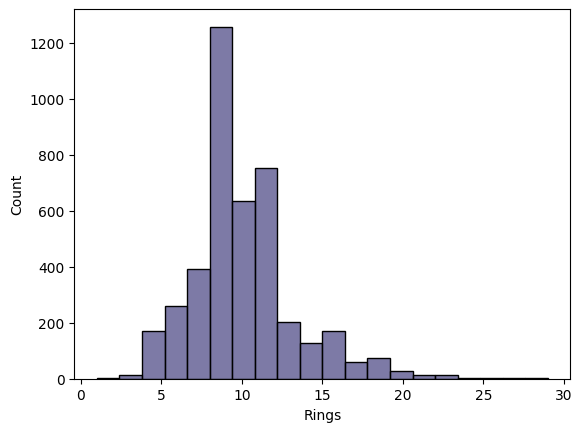

In [15]:
sns.histplot(dataset['Rings'],bins=20,color='#524E88')

<Axes: xlabel='Length', ylabel='Rings'>

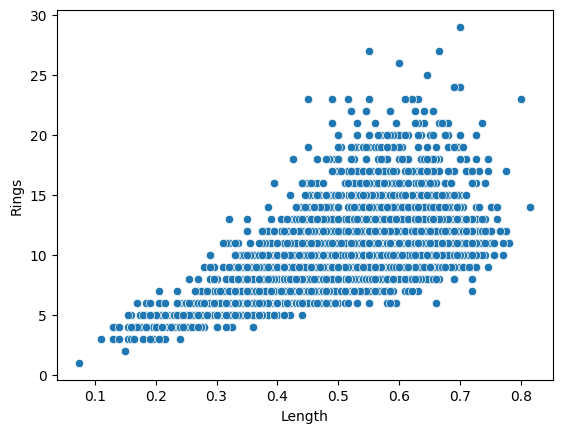

In [16]:
sns.scatterplot(x= 'Length',y='Rings',data =dataset)

<Axes: xlabel='Length', ylabel='Diameter'>

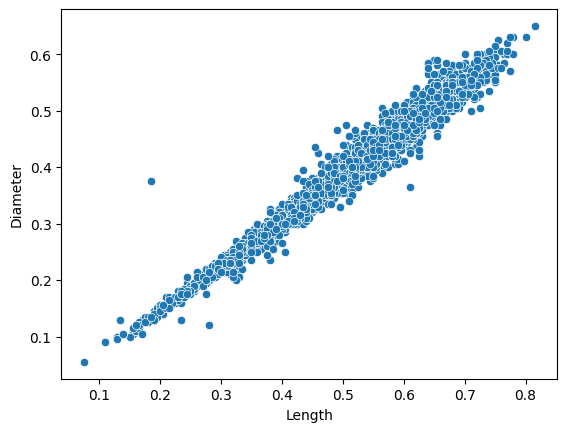

In [17]:
sns.scatterplot(x= 'Length',y='Diameter',data =dataset)

In [18]:
X = dataset.drop("Rings",axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [19]:
y = dataset['Rings']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33, random_state= 2)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_scaled = scaler.transform(X_train)

In [26]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.06028417, -0.54333502, -0.28827352, ..., -0.26813493,
        -0.25665947, -0.57064907],
       [ 0.06028417,  0.54642088,  0.42019316, ..., -0.00711796,
        -0.22455634,  0.54963011],
       [ 0.06028417, -1.04629929, -0.74371638, ..., -0.67091111,
        -0.55017377, -0.85975337],
       ...,
       [-1.15320591,  0.96555776,  1.17926459, ...,  0.36190604,
         1.16505044,  1.66990929],
       [-1.15320591,  0.92364408,  1.17926459, ...,  0.85693822,
         1.20173973,  1.38080499],
       [ 1.27377426, -0.41759396, -0.54129733, ..., -0.36264107,
        -0.84827424, -0.76940828]])

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [28]:
models = [('lg',LinearRegression()),('ridge',Ridge()),('lass',Lasso()),('dtr',DecisionTreeRegressor()),('rfr',RandomForestRegressor())]

In [29]:
for name,m in models:
  m.fit(X_train_scaled,y_train)
  y_pred = m.predict(X_test_scaled)

  print(f"{name} : with MSE : {mean_squared_error(y_test,y_pred)} and R2score : {r2_score(y_test,y_pred)}")

lg : with MSE : 5.190198582148626 and R2score : 0.5312802577047904
ridge : with MSE : 5.193953341816422 and R2score : 0.5309411704895299
lass : with MSE : 7.792523896475394 and R2score : 0.29626781427057625
dtr : with MSE : 8.472806381435824 and R2score : 0.2348324325618102
rfr : with MSE : 4.999334517766497 and R2score : 0.5485169305708935


In [30]:
ls = Lasso()
ls.fit(X_train_scaled,y_train)
y_pred = ls.predict(X_test)
y_pred

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


array([10.05680868, 10.1957929 , 10.02040407, ..., 10.33551797,
       10.30059506, 10.03143323])

In [31]:
def prediction_age(Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight):
  features = np.array([Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight])

  reshaped = features.reshape(1, -1)
  pred = ls.predict(reshaped)


  return  pred[0]

In [32]:
Sex = 0
Length = 0.555
Diameter = 0.365
Height = 0.9
Whole_weight = 	0.5140
Shucked_weight = 	0.2245
Viscera_weight = 	0.8010
Shell_weight = 0.15

prediction = prediction_age(Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight)
print(prediction)

10.105030762012591


In [36]:
type(prediction)

numpy.float64

In [33]:
import pickle

In [35]:
with open('mdl_pkl', 'wb') as f:
    pickle.dump(ls,f)

In [34]:
pickle.dump(ls,open('model.pkl','wb'))